In [1]:
# Standard
import os

# External 
import shap

# internal
from dataLoader.DataLoader import DataLoader
from models.RfModel import RFModel

In [2]:
# Load model
RF = RFModel({"n_estimators":100})
RF.load("RF_custom_features_two_target_best.pk")

Trying to unpickle estimator DecisionTreeRegressor from version 1.0 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


model successfully loaded to: trainedModels/RF_custom_features_two_target_best.pk


Trying to unpickle estimator RandomForestRegressor from version 1.0 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations


In [3]:
# Loading data
DL = DataLoader()
DL.createDataFrameSeperateCoef()
DL.addMoonSunFeatures(two_target=True)
DL.addTimRelatedFeatures(two_target=True)
df = DL.data

df_train, df_test = df[df.year!=2021], df[df.year==2021]
# Dropping year column 
df_train.drop(["year"], axis = 1, inplace=True)
df_test.drop(["year"], axis = 1, inplace=True)

# Getting X, y
X_train = df_train.iloc[:,2:]
X_test = df_test.iloc[:,2:]
y_train = df_train.iloc[:, 0:2]
y_test = df_test.iloc[:, 0:2]

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


data successfully loaded  with two target features
Features added successfully!
Date-Time features added with sucess!



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Waterfall Plot

In [ ]:
# Make prediction 
explainer = shap.Explainer(RF.model)
shap_values = explainer(X_test)

In [8]:
shap_values[0].shape

(11, 2)

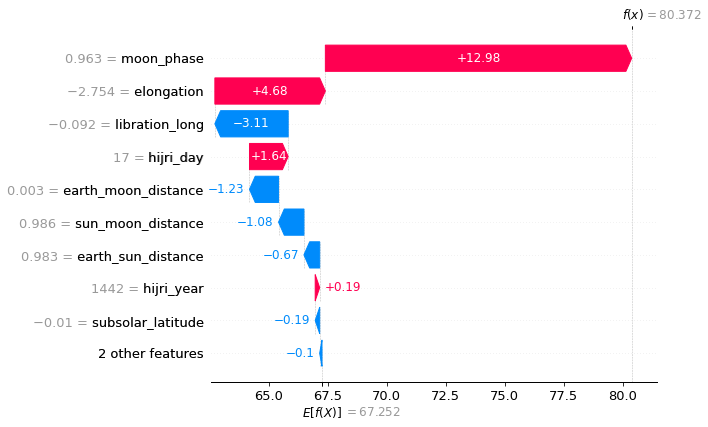

In [9]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0][:,0])

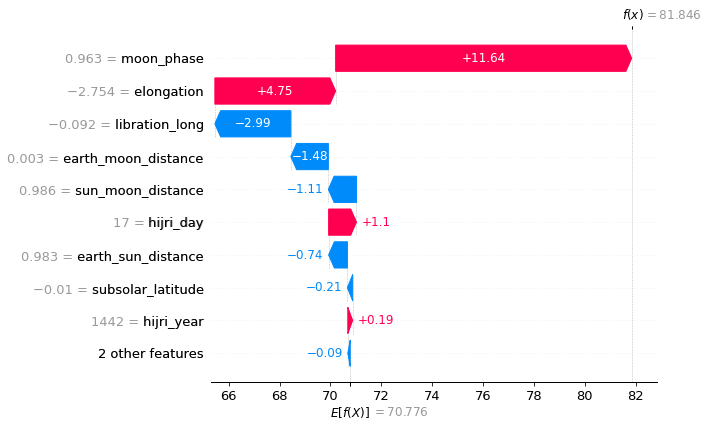

In [15]:
shap.plots.waterfall(shap_values[0][:,1])

### Force Plot

In [17]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[100][:,0])

### Bar Plot

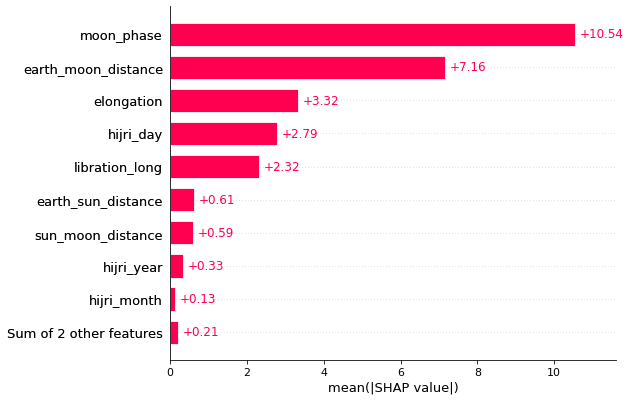

In [30]:
### Bar plot
shap.plots.bar(shap_values[:,:,0])

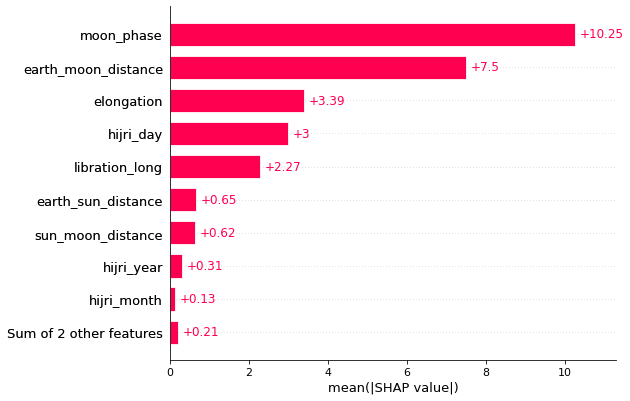

In [31]:
### Bar plot
shap.plots.bar(shap_values[:,:,1])

### Beeswarm plot

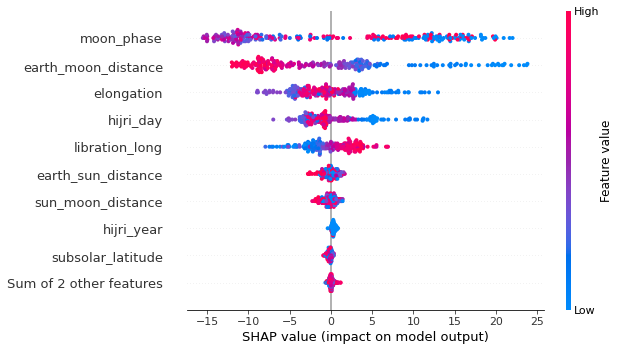

In [36]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values[:,:,0])

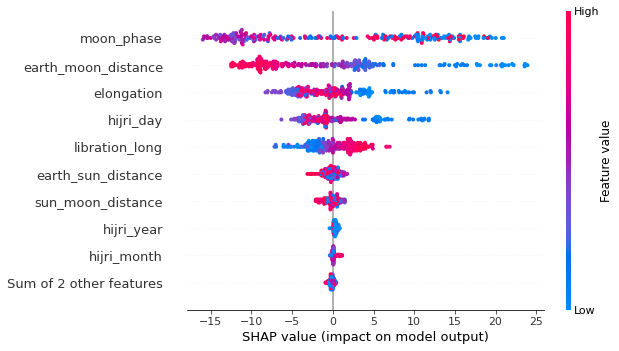

In [33]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values[:,:,1])